In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv')

In [132]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [134]:
df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [135]:
# Check for Duplicates
df.duplicated().sum()

4

In [136]:
# Drop the Duplicates
df.drop_duplicates(inplace=True)

In [137]:
df.shape

(62, 5)

> **Encoding the Categorical Data :**

In [138]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [139]:
df['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [140]:
df['Favorite Color'] = encoder.fit_transform(df['Favorite Color'])

In [141]:
df['Favorite Music Genre'].unique()

array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [142]:
df['Favorite Music Genre'] = encoder.fit_transform(df['Favorite Music Genre'])

In [143]:
df['Favorite Beverage'].unique()

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [144]:
df['Favorite Beverage'] = encoder.fit_transform(df['Favorite Beverage'])

In [145]:
df['Favorite Soft Drink'].unique()

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

In [146]:
df['Favorite Soft Drink'] = encoder.fit_transform(df['Favorite Soft Drink'])

In [147]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [148]:
df['Gender'] = encoder.fit_transform(df['Gender'])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Favorite Color        62 non-null     int64
 1   Favorite Music Genre  62 non-null     int64
 2   Favorite Beverage     62 non-null     int64
 3   Favorite Soft Drink   62 non-null     int64
 4   Gender                62 non-null     int64
dtypes: int64(5)
memory usage: 2.9 KB


> **Visualize the Data :**

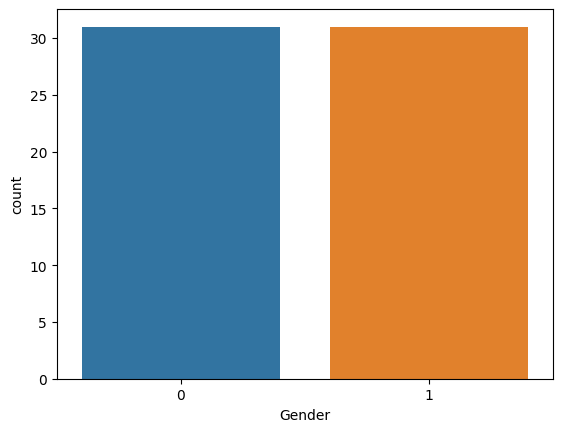

In [150]:
sns.countplot(x=df['Gender'])

plt.show()

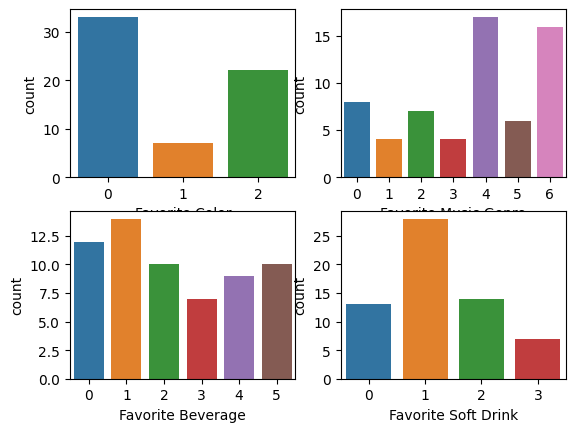

<Figure size 1000x1200 with 0 Axes>

In [151]:
fig, ax =plt.subplots(2,2)

plt.figure(figsize=(10,12))

sns.countplot(x=df['Favorite Color'], ax=ax[0,0])
sns.countplot(x=df['Favorite Music Genre'], ax=ax[0,1])
sns.countplot(x=df['Favorite Beverage'], ax=ax[1,0])
sns.countplot(x=df['Favorite Soft Drink'], ax=ax[1,1])

plt.show()

In [152]:
X = df.drop('Gender', axis=1)
Y = df['Gender']

In [153]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# **Logistic Regression Model**

> **Create and Train the Model :**

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log_regressor = LogisticRegression()
log_regressor.fit(x_train, y_train)

LogisticRegression()

> **Predict Test Set Results :**

In [156]:
log_regr_y_pred = log_regressor.predict(x_test)

In [157]:
pd.DataFrame({'Actual':y_test, 'Predicted':log_regr_y_pred})

,Actual,Predicted
52,1,1
58,1,0
0,0,0
59,1,1
5,0,0
50,1,1
16,0,1
12,0,0
27,0,1
63,1,1


> **Evaluate Performance of the Model :**

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
log_regr_score = accuracy_score(y_test, log_regr_y_pred)
log_regr_score

0.6153846153846154

In [160]:
log_regr_mat = confusion_matrix(y_test, log_regr_y_pred)
log_regr_mat

array([[4, 3],
       [2, 4]])

In [161]:
log_regr_report = classification_report(y_test, log_regr_y_pred)
print(log_regr_report)

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.57      0.67      0.62         6

    accuracy                           0.62        13
   macro avg       0.62      0.62      0.62        13
weighted avg       0.62      0.62      0.62        13



# **Decision Tree**

> **Create and Train Model :**

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_model = dt_clf.fit(x_train, y_train)

> **Predict Test Set Results :**

In [164]:
dt_y_pred = dt_clf.predict(x_test)

In [165]:
pd.DataFrame({'Actual':y_test, 'Predicted':dt_y_pred})

,Actual,Predicted
52,1,1
58,1,0
0,0,1
59,1,1
5,0,0
50,1,1
16,0,0
12,0,0
27,0,1
63,1,1


> **Evaluate Performance of the Model :**

In [166]:
dt_score = accuracy_score(y_test, dt_y_pred)
dt_score

0.6923076923076923

In [167]:
dt_mat = confusion_matrix(y_test, dt_y_pred)
dt_mat

array([[4, 3],
       [1, 5]])

In [168]:
dt_report = classification_report(y_test, dt_y_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.62      0.83      0.71         6

    accuracy                           0.69        13
   macro avg       0.71      0.70      0.69        13
weighted avg       0.72      0.69      0.69        13



> **Plot the Tree :**

[Text(0.46875, 0.95, 'x[1] <= 2.5\nentropy = 1.0\nsamples = 49\nvalue = [24, 25]'),
 Text(0.22916666666666666, 0.85, 'x[2] <= 2.5\nentropy = 0.896\nsamples = 16\nvalue = [5, 11]'),
 Text(0.125, 0.75, 'x[1] <= 0.5\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.08333333333333333, 0.65, 'x[3] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.041666666666666664, 0.55, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.125, 0.55, 'x[2] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.45, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.45, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.65, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.75, 'x[1] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.65, 'x[2] <= 4.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.20833333333333334, 0.55, 'entropy = 0.0\nsamples = 2\nvalue

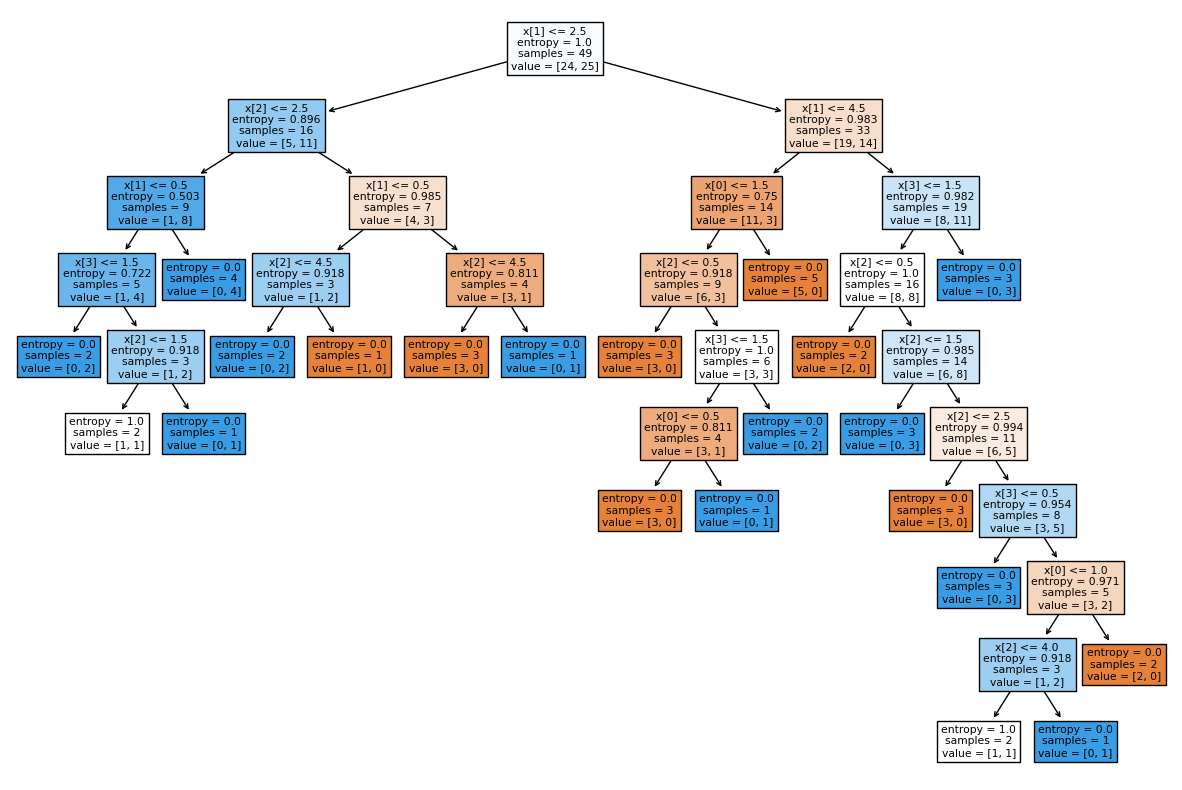

In [169]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True)

# **Random Forest Model**

> **Create and Train the Model :**

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf_clf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

> **Predict Test Set Results :**

In [172]:
rf_y_pred = rf_clf.predict(x_test)

In [173]:
pd.DataFrame({'Actual':y_test, 'Predicted':rf_y_pred})

,Actual,Predicted
52,1,1
58,1,0
0,0,1
59,1,1
5,0,1
50,1,1
16,0,0
12,0,0
27,0,1
63,1,1


> **Evaluate Performance of the Model :**

In [174]:
rf_clf_score = accuracy_score(y_test, rf_y_pred)
rf_clf_score

0.6923076923076923

In [175]:
rf_clf_mat = confusion_matrix(y_test, rf_y_pred)
rf_clf_mat

array([[4, 3],
       [1, 5]])

In [176]:
rf_clf_report = classification_report(y_test, rf_y_pred)
print(rf_clf_report)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.62      0.83      0.71         6

    accuracy                           0.69        13
   macro avg       0.71      0.70      0.69        13
weighted avg       0.72      0.69      0.69        13



# **SVM Classifier**

> **Create and Train the Model :**

In [177]:
from sklearn.svm import SVC

In [180]:
svm_clf = SVC(kernel='poly', degree=5, random_state=42)
svm_clf.fit(x_train, y_train)

SVC(degree=5, kernel='poly', random_state=42)

> **Predict Test Set Results :**

In [198]:
svm_clf_y_pred = svm_clf.predict(x_test)

In [182]:
pd.DataFrame({'Actual':y_test, 'Predicted':svm_clf_y_pred})

,Actual,Predicted
52,1,1
58,1,0
0,0,0
59,1,1
5,0,1
50,1,1
16,0,1
12,0,0
27,0,1
63,1,1


> **Evaluate Performance of the Model :**

In [199]:
svm_clf_score = accuracy_score(y_test, svm_clf_y_pred)
svm_clf_score

0.6153846153846154

In [200]:
svm_clf_mat = confusion_matrix(y_test, svm_clf_y_pred)
svm_clf_mat

array([[3, 4],
       [1, 5]])

In [201]:
svm_clf_report = classification_report(y_test, svm_clf_y_pred)
print(svm_clf_report)

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.56      0.83      0.67         6

    accuracy                           0.62        13
   macro avg       0.65      0.63      0.61        13
weighted avg       0.66      0.62      0.60        13



# **KNN Classification Model**

> **Create and Train the Model :**

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

> **Predict Test Set Results :**

In [190]:
knn_clf_y_pred = knn_clf.predict(x_test)

In [191]:
pd.DataFrame({'Actual':y_test, 'Predicted':knn_clf_y_pred})

,Actual,Predicted
52,1,1
58,1,0
0,0,1
59,1,1
5,0,0
50,1,0
16,0,1
12,0,0
27,0,0
63,1,1


> **Evaluate Performance of the Model :**

In [195]:
knn_clf_score = accuracy_score(y_test, knn_clf_y_pred)
knn_clf_score

0.6923076923076923

In [196]:
knn_clf_mat = confusion_matrix(y_test, knn_clf_y_pred)
knn_clf_mat

array([[5, 2],
       [2, 4]])

In [197]:
knn_clf_report = classification_report(y_test, knn_clf_y_pred)
print(knn_clf_report)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.67      0.67      0.67         6

    accuracy                           0.69        13
   macro avg       0.69      0.69      0.69        13
weighted avg       0.69      0.69      0.69        13



# **Compare Performances of all the Models**

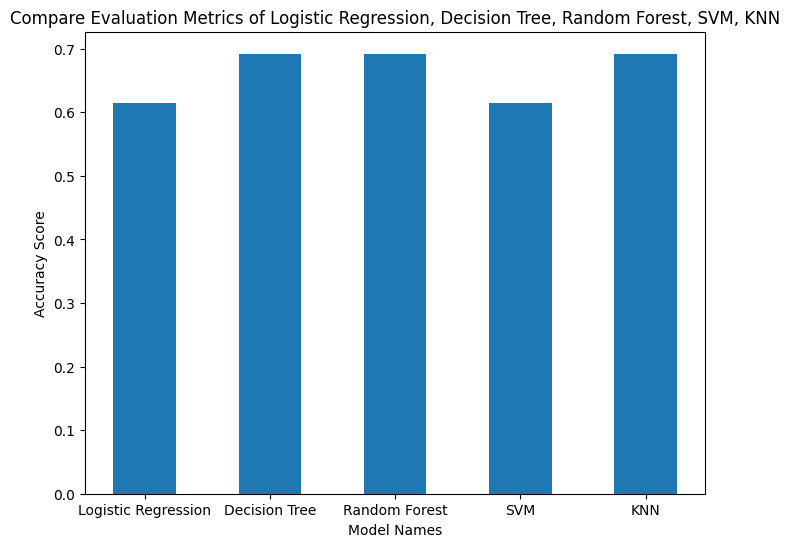

In [211]:
data = [log_regr_score, dt_score, rf_clf_score, svm_clf_score, knn_clf_score]
categories = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

plt.figure(figsize=(8,6))

plt.bar(categories, data, width=0.50)

plt.xlabel('Model Names')
plt.ylabel('Accuracy Score')
plt.title('Compare Evaluation Metrics of Logistic Regression, Decision Tree, Random Forest, SVM, KNN')

# Show the plot
plt.show()

**(Decision_Tree == Random_Forest == KNN) > (Logistic_Regression == SVM)**